# Final Project
Diego Cuevas\
Wooded Areas Notebook

To establish the best neighborhood to ghost hunt, I decided to find the neighborhood with the most wooded areas. Typically, most ghost stories occur in old houses or abandoned places. But there can be the occasional haunted story in a forest. 

In [4]:
import fpsnippets
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

NEIGHBORHOODS = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
wooded_areas = geopandas.read_file("https://data.wprdc.org/dataset/8d3104f6-a1dc-46b0-a2bc-9715af02f543/resource/7d60eaf8-c7b8-491d-96cf-671ae3a3b27d/download/alcogisallegheny-county-wooded-area-boundaries.zip")


The first thing I did was read the shapefiles of the neighborhoods and wooded areas of Pittsburgh.

In [5]:

# print(wooded_areas.columns)                         
def wood_to_neighborhoods():
    wood_neighborhoods = {}
    for _idx, wooded in wooded_areas.iterrows():
        wood_point = wooded["geometry"]
        neighborhood_list = []
        for idx, neighborhood in NEIGHBORHOODS.iterrows():
            if neighborhood["geometry"].contains(wood_point):
                neighborhood_list.append(neighborhood["hood"])
        wood_neighborhoods[wooded["WOODLAND_"]] = neighborhood_list
    return wood_neighborhoods

wood = wood_to_neighborhoods()


I then made a function that returns a dictionary of wooded areas and the neighborhood they are in. However, I noticed not all of the wooded areas were within the area of a neighborhood. So I created a filter function to remove any areas that did not have a neighborhood.

In [6]:
def filter_wood_without_neighborhoods(wooded_neighborhoods):
    filtered_wood = {wood: neighborhoods for wood, neighborhoods in wooded_neighborhoods.items() if neighborhoods}
    return filtered_wood
filtered_wood = filter_wood_without_neighborhoods(wood)

def neighborhood_frequency(neighborhoods):
    neighborhood_counts = {}
    for neighborhoods_list in neighborhoods.values():
        for neighborhood in neighborhoods_list:
            if neighborhood in neighborhood_counts:
                neighborhood_counts[neighborhood] += 1
            else:
                neighborhood_counts[neighborhood] = 1
    return neighborhood_counts

wood_neighborhood_freq = neighborhood_frequency(filtered_wood)


But to analyze the data of the neighborhoods with wooded areas, I had to tally up the frequency of wooded areas in each neighborhood. This gave me a dictionary with each neighborhood and the number of forests within them. I then started to use the data to make conclusions.

In [7]:
def neighborhood_with_most_wooded_areas(neighborhood_freq):
    max_neighborhood = max(neighborhood_freq, key=neighborhood_freq.get)
    max_count = neighborhood_freq[max_neighborhood]
    return max_neighborhood, max_count

most_wooded_neighborhood, count = neighborhood_with_most_wooded_areas(wood_neighborhood_freq)
print(f"The neighborhood with the most wooded areas is {most_wooded_neighborhood} with a count of {count}.")

def average_neighborhood_frequency(neighborhood_freq):
    total_wooded_areas = sum(neighborhood_freq.values())
    num_neighborhoods = len(neighborhood_freq)
    average_frequency = total_wooded_areas / num_neighborhoods
    return average_frequency

average_freq = average_neighborhood_frequency(wood_neighborhood_freq)
print(f"The average frequency of wooded areas per neighborhood is {average_freq:.2f}")



The neighborhood with the most wooded areas is Squirrel Hill South with a count of 44.
The average frequency of wooded areas per neighborhood is 9.48


## Conclusion:

I found the neighborhood with the most wooded areas to be Squirrel Hill, and the average of wooded areas in a neighborhood to be 9.48. Squirrel Hill nearly has five times the average. If I were a ghost hunter, I would begin my search for spirits in that Pittsburgh neighborhood

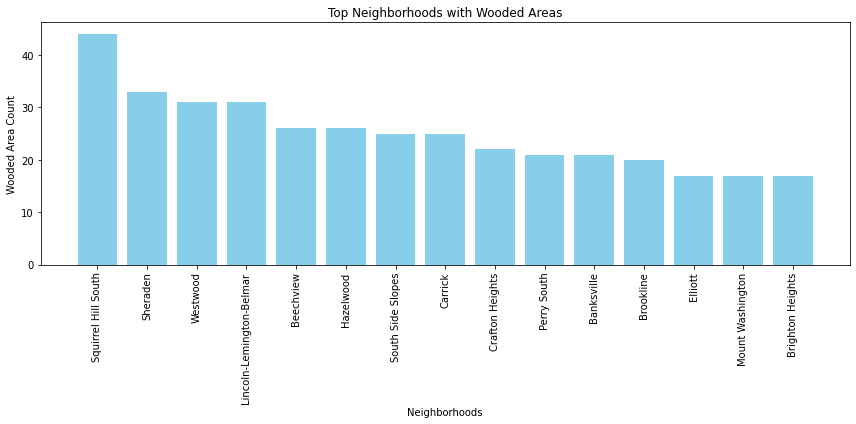

Top 15 Neighborhoods with Wooded Areas:
1. Squirrel Hill South: 44
2. Sheraden: 33
3. Westwood: 31
4. Lincoln-Lemington-Belmar: 31
5. Beechview: 26
6. Hazelwood: 26
7. South Side Slopes: 25
8. Carrick: 25
9. Crafton Heights: 22
10. Perry South: 21
11. Banksville: 21
12. Brookline: 20
13. Elliott: 17
14. Mount Washington: 17
15. Brighton Heights: 17

Bottom 10 Neighborhoods with Wooded Areas:
1. Lower Lawrenceville: 1
2. East Liberty: 1
3. Central Northside: 1
4. Central Lawrenceville: 1
5. East Allegheny: 1
6. Bedford Dwellings: 1
7. Allegheny West: 1
8. Arlington Heights: 1
9. Knoxville: 1
10. South Side Flats: 1


In [9]:
def visualize_neighborhood_frequencies(neighborhood_freq, top_n=15):
    sorted_neighborhoods = sorted(neighborhood_freq, key=neighborhood_freq.get, reverse=True)[:top_n]
    frequencies = [neighborhood_freq[n] for n in sorted_neighborhoods]

    plt.figure(figsize=(12, 6))
    plt.bar(sorted_neighborhoods, frequencies, color='skyblue')
    plt.xlabel('Neighborhoods')
    plt.ylabel('Wooded Area Count')
    plt.title('Top Neighborhoods with Wooded Areas')
    plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels more for better readability
    plt.tight_layout()
    plt.show()
    
    top_neighborhoods = {neighborhood: neighborhood_freq[neighborhood] for neighborhood in sorted_neighborhoods}
    print("Top 15 Neighborhoods with Wooded Areas:")
    for idx, (neighborhood, count) in enumerate(top_neighborhoods.items(), 1):
        print(f"{idx}. {neighborhood}: {count}")
    
    bottom_neighborhoods = sorted(neighborhood_freq, key=neighborhood_freq.get)[:10]
    bottom_freq = {neighborhood: neighborhood_freq[neighborhood] for neighborhood in bottom_neighborhoods}
    print("\nBottom 10 Neighborhoods with Wooded Areas:")
    for idx, (neighborhood, count) in enumerate(bottom_freq.items(), 1):
        print(f"{idx}. {neighborhood}: {count}")
    
visualize_neighborhood_frequencies(wood_neighborhood_freq)